In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix

In [2]:
# Load the dataset into a dataframe
df = pd.read_excel('AM41PR_Preeti_Mehra_Dataset.xlsx')

In [3]:
df.head()

,Year,Country,Students
0,2014_15,Algeria,285
1,2014_15,Angola,365
2,2014_15,Benin,25
3,2014_15,Botswana,530
4,2014_15,Burkina Faso,15


In [4]:
#checking null values
df.isnull().sum()

,0
Year,0
Country,0
Students,0


In [5]:
# Inspecting the dataframe structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      1816 non-null   object
 1   Country   1816 non-null   object
 2   Students  1816 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 42.7+ KB


In [6]:
# Get statistical summary
df.describe()

,Students
count,1816.000000
mean,2193.824339
std,9381.232288
min,0.000000
25%,15.000000
50%,120.000000
75%,1275.000000
max,151690.000000


# **Exploratory Data Analysis (EDA)**

**1. What are the trends in total student enrollment over time?**

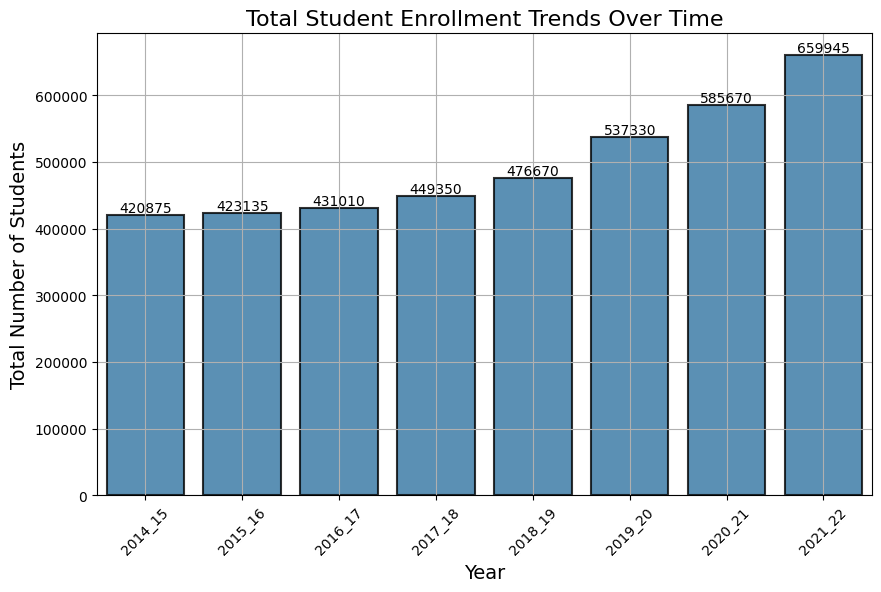

In [7]:
# Aggregating data by year
total_enrollment_per_year = df.groupby('Year')['Students'].sum().reset_index()

# Visualization: Total student enrollment trends over time (Simulating cylindrical bars)
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Year', y='Students', data=total_enrollment_per_year)

# Adding title and labels
plt.title('Total Student Enrollment Trends Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Number of Students', fontsize=14)
plt.xticks(rotation=45)

# Add gridlines for readability
plt.grid(True)

# Customize bars to have a cylindrical-like effect by using rounded edges
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
    p.set_edgecolor('black')
    p.set_linewidth(1.5)  # Adds an outline to the bars
    p.set_alpha(0.8)      # Makes the bars slightly transparent to give a softer look

# Display the plot
plt.show()


**2. How did Brexit affect the total number of international students over time?**

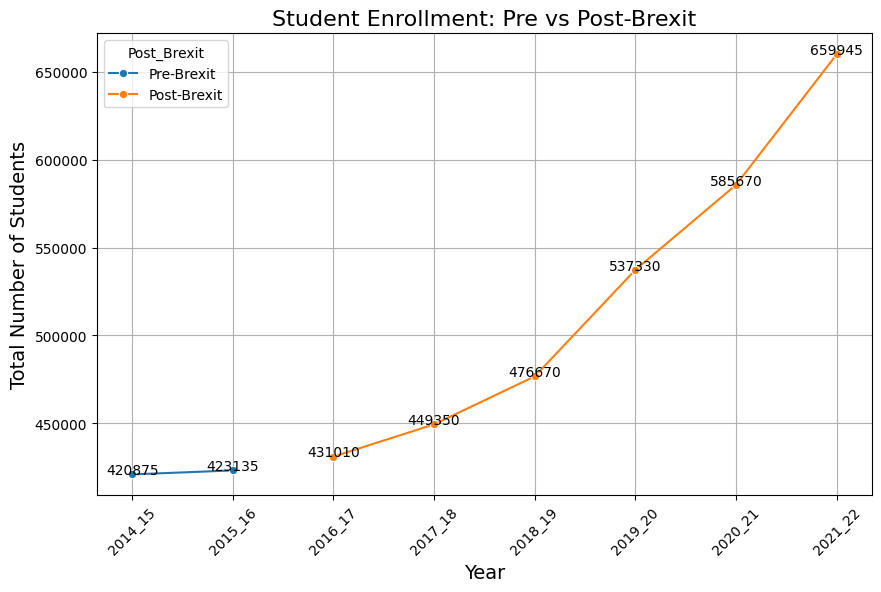

In [8]:

# Create a new dataframe for analysis without modifying the original 'df'
enrollment_by_brexit = df[['Year', 'Students']].copy()

# Create a 'Post_Brexit' flag in the new dataframe
enrollment_by_brexit['Post_Brexit'] = enrollment_by_brexit['Year'].apply(lambda x: 'Post-Brexit' if x >= '2016_17' else 'Pre-Brexit')

# Aggregating by year and Brexit status
enrollment_by_brexit = enrollment_by_brexit.groupby(['Year', 'Post_Brexit'])['Students'].sum().reset_index()

# Visualization: Total student enrollment pre and post-Brexit
plt.figure(figsize=(10,6))
ax = sns.lineplot(x='Year', y='Students', hue='Post_Brexit', data=enrollment_by_brexit, marker='o')

# Adding title and labels
plt.title('Student Enrollment: Pre vs Post-Brexit', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Number of Students', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)

# Adding labels on the points
for i in range(enrollment_by_brexit.shape[0]):
    plt.text(enrollment_by_brexit['Year'][i],
             enrollment_by_brexit['Students'][i] + 100,  # Adjust the position above the point
             f'{enrollment_by_brexit["Students"][i]}',
             horizontalalignment='center', size=10, color='black')

# Display the plot
plt.show()


**3. What was the impact of COVID-19 on student enrollment?**

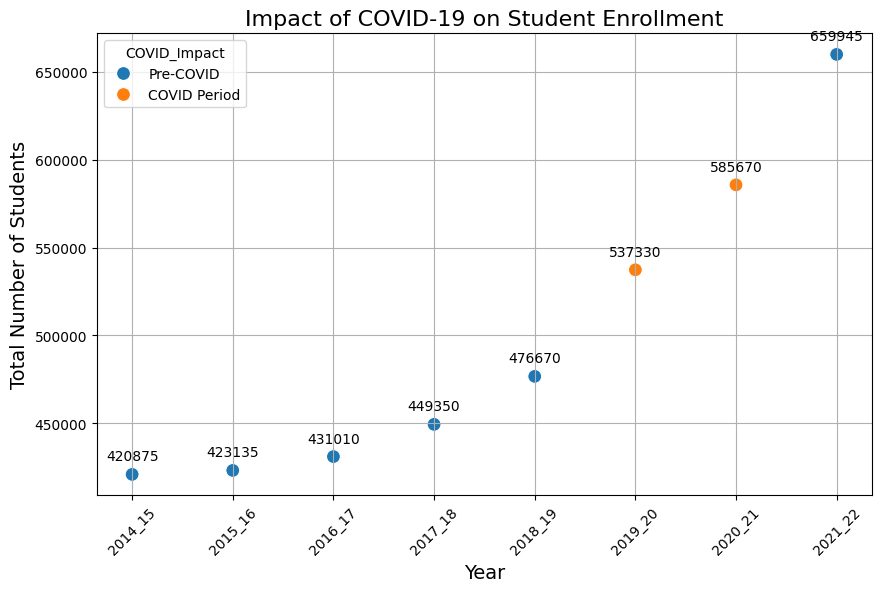

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a new dataframe for analysis without modifying the original 'df'
enrollment_by_covid = df[['Year', 'Students']].copy()

# Create a 'COVID_Impact' flag in the new dataframe
enrollment_by_covid['COVID_Impact'] = enrollment_by_covid['Year'].apply(lambda x: 'COVID Period' if x in ['2019_20', '2020_21'] else 'Pre-COVID')

# Aggregating by year and COVID impact status
enrollment_by_covid = enrollment_by_covid.groupby(['Year', 'COVID_Impact'])['Students'].sum().reset_index()

# Visualization: Impact of COVID-19 on student enrollment with scatter plot
plt.figure(figsize=(10,6))

# Scatter plot for pre-COVID and COVID period data
ax = sns.scatterplot(x='Year', y='Students', hue='COVID_Impact', data=enrollment_by_covid, s=100, marker='o')

# Adding title and labels
plt.title('Impact of COVID-19 on Student Enrollment', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Number of Students', fontsize=14)
plt.xticks(rotation=45)

# Add gridlines for readability
plt.grid(True)

# Adding labels on top of the points
for line in ax.collections:
    for i in range(len(line.get_offsets())):
        x, y = line.get_offsets()[i]
        ax.annotate(f'{int(y)}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=10)

# Display the plot
plt.show()


**4. Which countries contributed most to student enrollment over the years?**

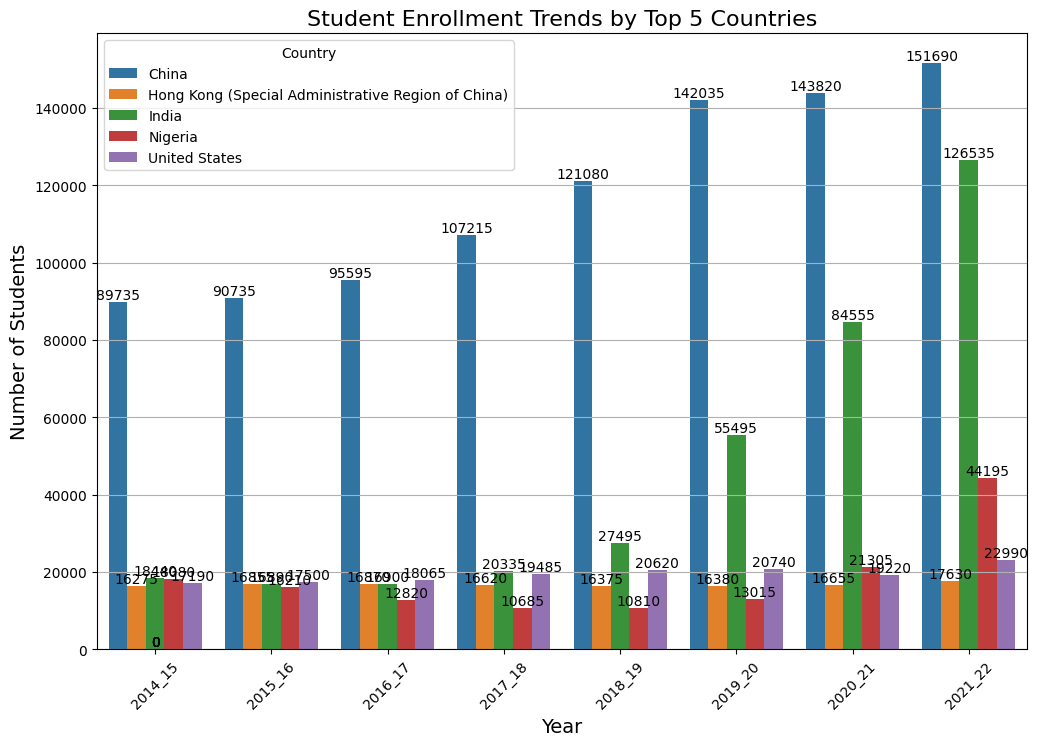

In [10]:
# Aggregating data by year and country
top_countries = df.groupby(['Year', 'Country'])['Students'].sum().reset_index()

# Filter top 5 countries with the most students
top_countries_list = df.groupby('Country')['Students'].sum().nlargest(5).index
top_countries = top_countries[top_countries['Country'].isin(top_countries_list)]

# Visualization 4: Bar plot of enrollment trends by country
plt.figure(figsize=(12,8))
ax = sns.barplot(x='Year', y='Students', hue='Country', data=top_countries)

# Adding title and labels
plt.title('Student Enrollment Trends by Top 5 Countries', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)
plt.xticks(rotation=45)

# Add gridlines for readability
plt.grid(axis='y')

# Adding labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Display the plot
plt.show()


# **Splitting the dataset**

In [11]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# One-hot encoding Country
df_encoded = pd.get_dummies(df, columns=['Country'], drop_first=True)

# Convert 'Students' into classes (Low, Medium, High)
bins = [0, 100, 500, df['Students'].max()]
labels = ['Low', 'Medium', 'High']
df_encoded['Student_Class'] = pd.cut(df_encoded['Students'], bins=bins, labels=labels)

# Encoding the target labels (Low, Medium, High) into numerical values
le = LabelEncoder()
df_encoded['Student_Class_Encoded'] = le.fit_transform(df_encoded['Student_Class'])

# Preparing the data
X = df_encoded[['Year'] + [col for col in df_encoded.columns if col.startswith('Country_')]]  # Features
y = df_encoded['Student_Class_Encoded']  # Target: Student classes (Low, Medium, High)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **RandomForestClassifier**

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred)}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Random Forest Accuracy: 0.8928571428571429

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       123
           1       0.84      0.90      0.87       126
           2       0.83      0.83      0.83        58
           3       0.91      0.74      0.82        57

    accuracy                           0.89       364
   macro avg       0.89      0.86      0.87       364
weighted avg       0.89      0.89      0.89       364



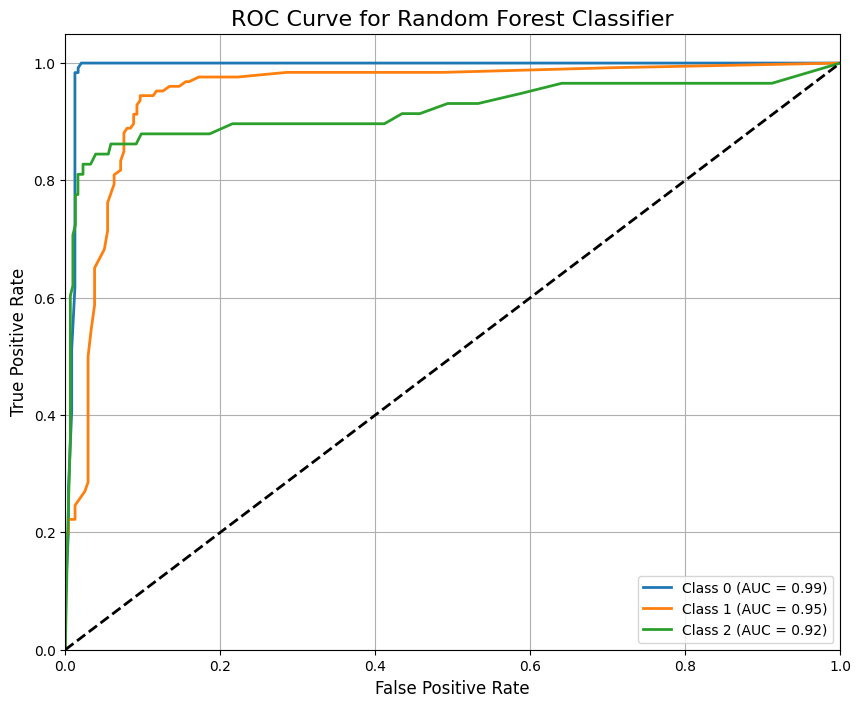

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels for multi-class ROC AUC
y_train_bin = label_binarize(y_train, classes=[0, 1, 2])  # Assuming 3 classes: Low=0, Medium=1, High=2
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

n_classes = y_train_bin.shape[1]

# Train the RandomForestClassifier
rf_classifier.fit(X_train, y_train)

# Predict probabilities (for ROC AUC curve)
y_prob = rf_classifier.predict_proba(X_test)

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC AUC curve for each class and micro-average
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve for Random Forest Classifier', fontsize=16)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True)
plt.show()


# **KNeighborsClassifier**

In [14]:
from sklearn.neighbors import KNeighborsClassifier
# Initialize and train the KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
# Make predictions
y_pred = knn_classifier.predict(X_test)
# Evaluate the model
print(f'KNN Accuracy: {accuracy_score(y_test, y_pred)}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))

KNN Accuracy: 0.3791208791208791

Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.33      0.37       123
           1       0.36      0.77      0.49       126
           2       0.00      0.00      0.00        58
           3       0.00      0.00      0.00        57

    accuracy                           0.38       364
   macro avg       0.20      0.28      0.22       364
weighted avg       0.27      0.38      0.30       364



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


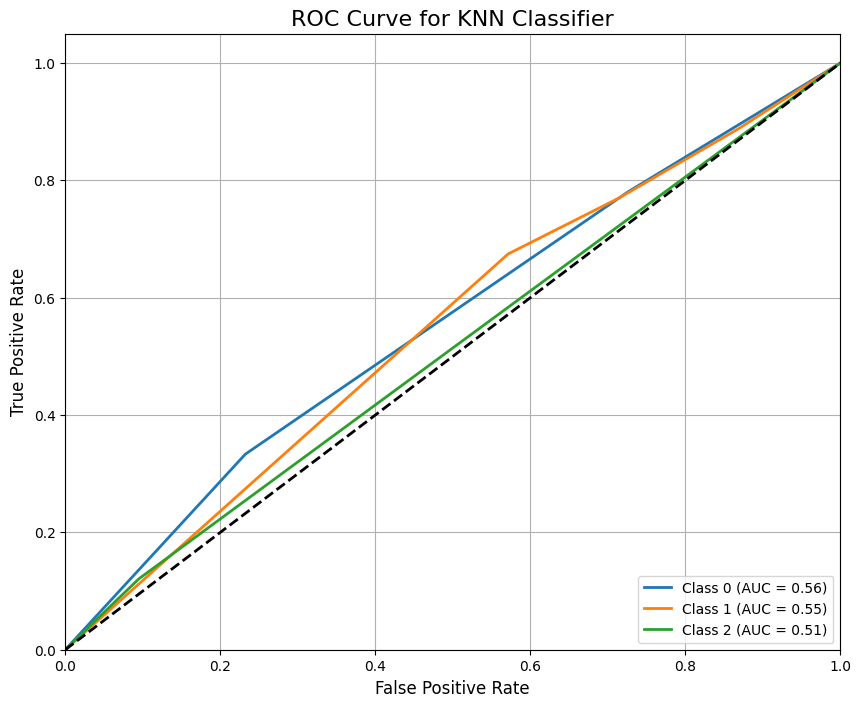

In [15]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels for multi-class ROC AUC
y_train_bin = label_binarize(y_train, classes=[0, 1, 2])  # Assuming 3 classes: Low=0, Medium=1, High=2
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

n_classes = y_train_bin.shape[1]

# Initialize and train the KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Predict probabilities (for ROC AUC curve)
y_prob = knn_classifier.predict_proba(X_test)

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC AUC curve for each class
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve for KNN Classifier', fontsize=16)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True)
plt.show()


# **SVC**

In [16]:
from sklearn.svm import SVC

# Initialize and train the Support Vector Classifier
svc_classifier = SVC(kernel='linear')
svc_classifier.fit(X_train, y_train)

# Make predictions
y_pred = svc_classifier.predict(X_test)

# Evaluate the model
print(f'SVC Accuracy: {accuracy_score(y_test, y_pred)}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))


SVC Accuracy: 0.33516483516483514

Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.47      0.38       123
           1       0.35      0.51      0.41       126
           2       0.00      0.00      0.00        58
           3       0.00      0.00      0.00        57

    accuracy                           0.34       364
   macro avg       0.17      0.24      0.20       364
weighted avg       0.23      0.34      0.27       364



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


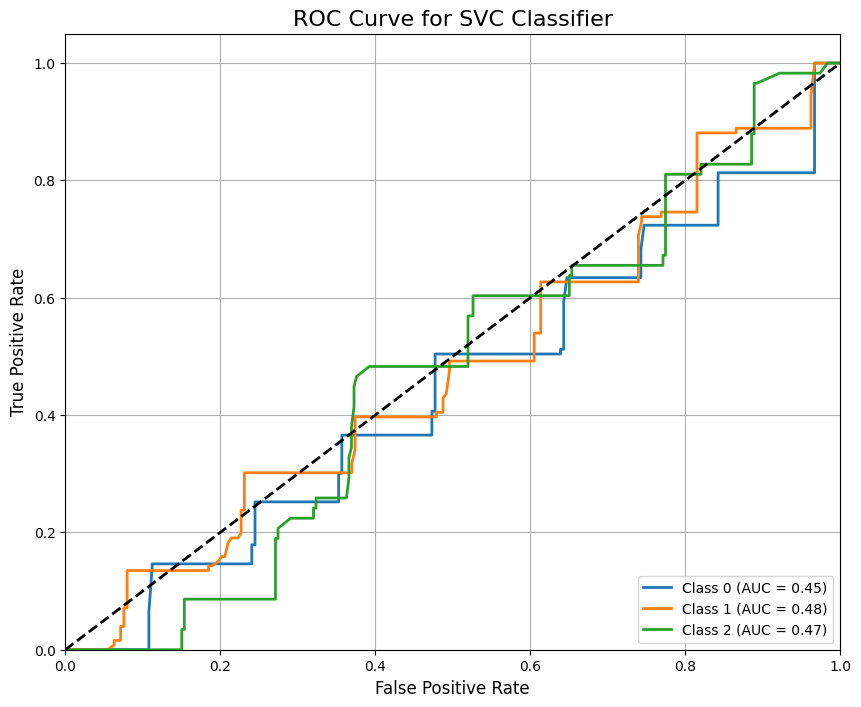

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels for multi-class ROC AUC
y_train_bin = label_binarize(y_train, classes=[0, 1, 2])  # Assuming 3 classes: Low=0, Medium=1, High=2
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

n_classes = y_train_bin.shape[1]

# Initialize and train the SVC with probability enabled
svc_classifier = SVC(kernel='linear', probability=True)
svc_classifier.fit(X_train, y_train)

# Predict probabilities (for ROC AUC curve)
y_prob = svc_classifier.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


# Plot the ROC AUC curve for each class and micro-average
plt.figure(figsize=(10, 8))

# Plot ROC curve for each class
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')


# Plot settings
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line (chance level)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve for SVC Classifier', fontsize=16)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True)
plt.show()


# **Evaluation**

**Confusion Matrix**

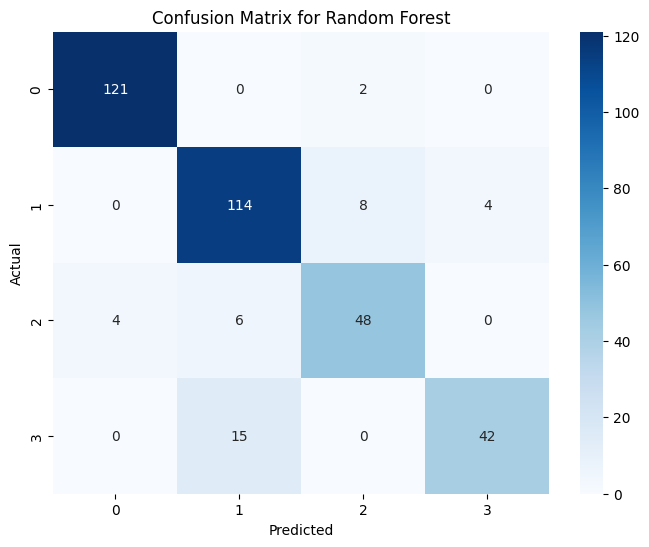

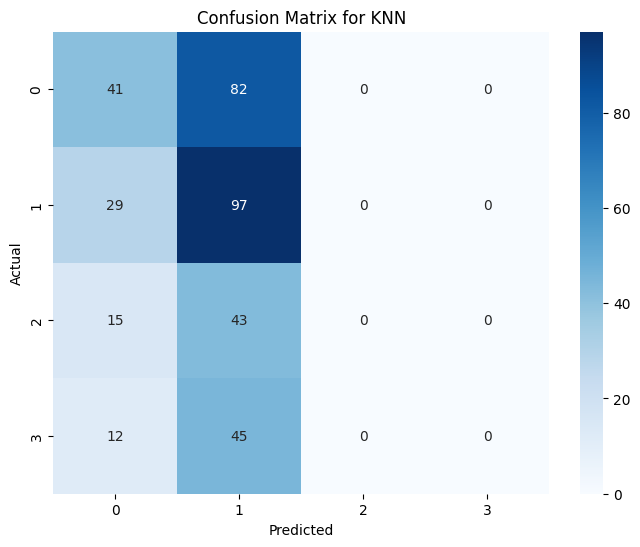

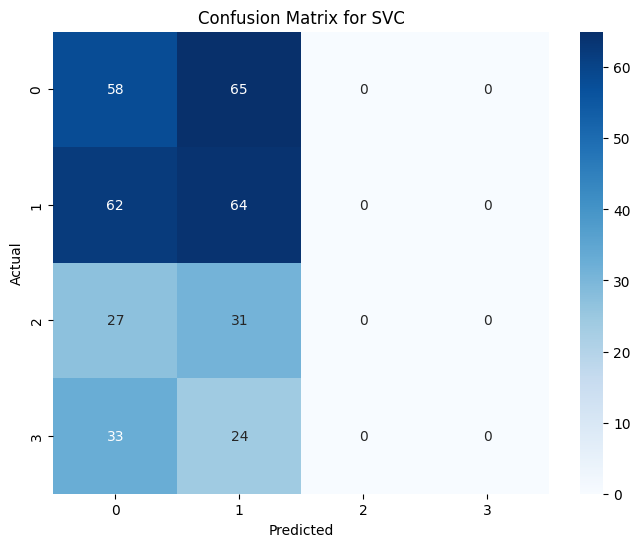

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Assuming the data has already been split and binarized for multi-class classification
# X_train, X_test, y_train, y_test
# If needed, use train_test_split to split the data

# Initialize models
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
svc_classifier = SVC(kernel='linear', probability=True, random_state=42)

# Store models in a dictionary for easy iteration
models = {
    'Random Forest': rf_classifier,
    'KNN': knn_classifier,
    'SVC': svc_classifier
}

# Plot Confusion Matrix for each model
for model_name, model in models.items():

    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)



    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(set(y_train)), yticklabels=sorted(set(y_train)))
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


**Comparison Plot**

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


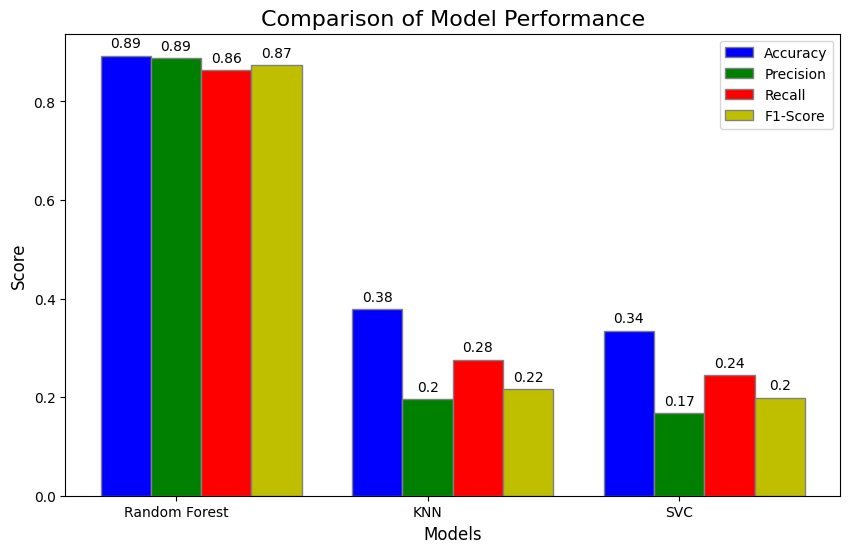

In [23]:

# Store models in a dictionary for easy iteration
models = {
    'Random Forest': rf_classifier,
    'KNN': knn_classifier,
    'SVC': svc_classifier
}

# Dictionary to store the results
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Store the results
    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy_score(y_test, y_pred))
    results['Precision'].append(precision_score(y_test, y_pred, average='macro'))  # For multi-class, use 'macro'
    results['Recall'].append(recall_score(y_test, y_pred, average='macro'))
    results['F1-Score'].append(f1_score(y_test, y_pred, average='macro'))

# Convert results to NumPy arrays for easier plotting
models = results['Model']
accuracy = np.array(results['Accuracy'])
precision = np.array(results['Precision'])
recall = np.array(results['Recall'])
f1_score_values = np.array(results['F1-Score'])

# Bar width
bar_width = 0.2

# X-axis positions for each group of bars
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plot the bar plot
plt.figure(figsize=(10, 6))
bars1 = plt.bar(r1, accuracy, color='b', width=bar_width, edgecolor='grey', label='Accuracy')
bars2 = plt.bar(r2, precision, color='g', width=bar_width, edgecolor='grey', label='Precision')
bars3 = plt.bar(r3, recall, color='r', width=bar_width, edgecolor='grey', label='Recall')
bars4 = plt.bar(r4, f1_score_values, color='y', width=bar_width, edgecolor='grey', label='F1-Score')

# Add labels on top of each bar
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Models', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Comparison of Model Performance', fontsize=16)
plt.xticks([r + bar_width for r in range(len(models))], models)
plt.legend()

# Display the plot
plt.show()


# **Unsupervised Machine learning model**

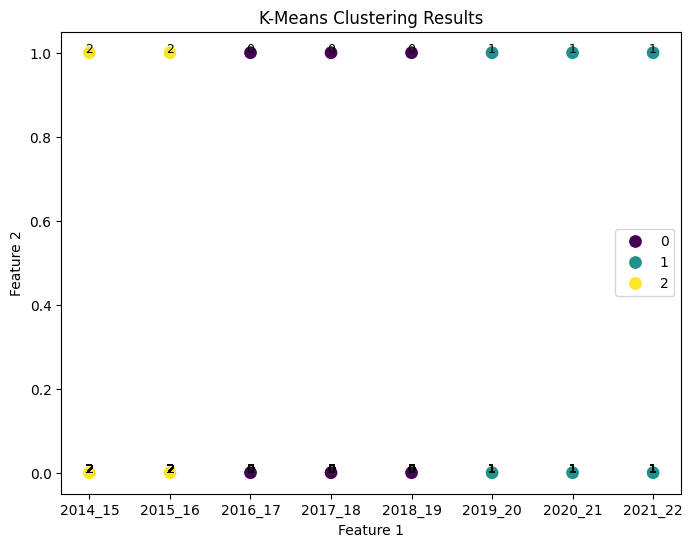

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'X' is a pandas DataFrame
# Initialize the KMeans model with 3 clusters and set n_init explicitly
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# Fit the model and predict cluster labels
kmeans_labels = kmeans.fit_predict(X)

# Add cluster labels to the dataset for visualization (optional)
plt.figure(figsize=(8, 6))
# Use .iloc for pandas DataFrame slicing
scatter_plot = sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=kmeans_labels, palette='viridis', s=100)
plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Label each data point with its cluster
for i in range(X.shape[0]):
    plt.text(X.iloc[i, 0], X.iloc[i, 1], str(kmeans_labels[i]), fontsize=9, ha='center')

plt.show()


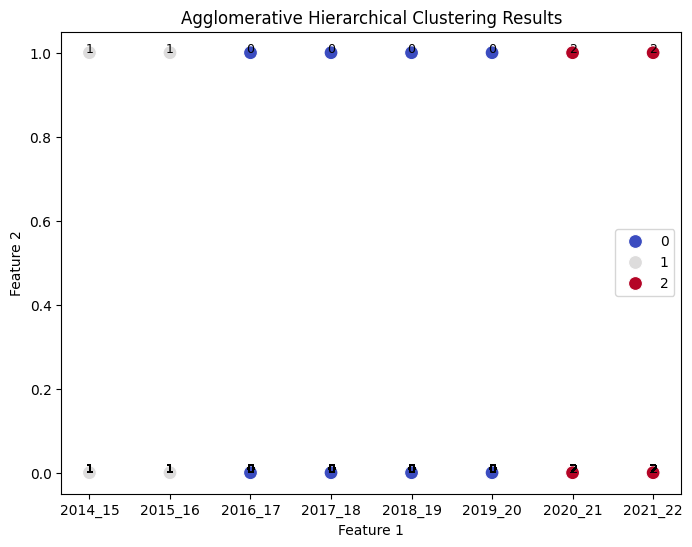

In [25]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


# Assuming 'X' is a pandas DataFrame
# Initialize the Agglomerative Clustering model
agg_cluster = AgglomerativeClustering(n_clusters=3)

# Fit the model and predict cluster labels
agg_labels = agg_cluster.fit_predict(X)

# Visualize the clustering results
plt.figure(figsize=(8,6))
scatter_plot = sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=agg_labels, palette='coolwarm', s=100)
plt.title('Agglomerative Hierarchical Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Label each data point with its cluster
for i in range(X.shape[0]):
    plt.text(X.iloc[i, 0], X.iloc[i, 1], str(agg_labels[i]), fontsize=9, ha='center')

plt.show()
